# Trabajo Práctico 2

In [1]:
# imports de libs que usamos para leer y procesar datos en masa
import os
import csv
import zipfile
import io
import sys

import numpy as np
import pandas as pd
from PIL import Image

# lib que usamos para mostrar las imágenes
import matplotlib.pyplot as plt

# libs que usamos para tareas generales de machine learning: separar conjuntos de datos, evaluar exactitud, etc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# libs que usamos para construir y entrenar redes neuronales
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Convolution2D, MaxPooling2D, Flatten, Activation
from keras.layers.normalization import BatchNormalization

# configuración para que las imágenes se vean dentro del notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
z ='../datasets/shipsnet/shipsnet/'
#train = pd.read_csv(zf.open('train.csv'))
#train.shape

In [3]:
def load_data(data_dir):
    dirs = [d for d in os.listdir(data_dir)]
           #if os.path.isdir(os.path.join(data_dir,d))]
    print(dirs)

In [4]:
load_data(z)

['1__20180708_180453_0f28__-118.22546866395027_33.737983155799235.png', '0__20170501_180611_100e__-122.48838321726191_37.67210938612325.png', '0__20161018_192055_0d05__-122.34538215222926_37.73270120838732.png', '1__20170618_180802_0f34__-122.32751841561911_37.708968116907286.png', '1__20170910_181216_1010__-122.35188051380415_37.74882559310978.png', '1__20180205_181811_1030__-122.39782230108867_37.798740586411384.png', '1__20170129_181027_0e1f__-122.3203380656004_37.71630873809904.png', '0__20170730_191231_0f21__-122.34184325361097_37.751717265244366.png', '0__20180712_180755_0f2d__-118.1509285019418_33.736157292984934.png', '0__20170430_181117_0e26__-122.28903227894936_37.76160433354677.png', '1__20170717_180818_1010__-122.33908910143056_37.73975043117767.png', '0__20170721_180825_100b__-122.42091671358793_37.75188895390692.png', '0__20180131_175841_1010__-118.14724396474439_33.726965541492056.png', '0__20180706_180914_1051__-118.16578607470981_33.728496393505175.png', '0__20170615_1

In [101]:
width, height = 80,80
channels = 3
directorio_training = '../datasets/shipsnet/Training/'
directorio_testing = '../datasets/shipsnet/Validation/'
columns = []

#Agregamos los nombres de las columnas a ambos csv.

'''for color in range(channels):
    count = 0
    for x in range(width):
        for y in range(height):
            if color == 0:
                columns.append("R" + str(count))
            elif color == 1: 
                columns.append("G" + str(count))
            elif color == 2: 
                columns.append("B" + str(count))
            count += 1'''
count=0
for x in range(width):
    for y in range(height):
        columns.append("P" + str(count))
        count += 1
columns.append("target_class")
columns.append("name")

with open('train.csv', 'w+') as f:
    thewriter = csv.writer(f) 
    thewriter.writerow(columns)

with open('test.csv', 'w+') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(columns)

fruta = ""
path = ""

#Recorremos la carpeta de Training, cargamos los datos de la imagen, recorremos todos los pixeles 
#y agregamos una nueva fila en el csv.

'''for subdir, dirs, files in os.walk(directorio_training):
    fruta = os.path.basename(subdir)
    for file in files:
        im = Image.open(os.path.join(subdir, file))
        path = os.path.join(subdir, file)        
        im.thumbnail((width,height))
        pix = im.load()        
        datos_imagen = []
        for color in range(channels):
            for x in range(width):
                for y in range(height):
                    if color == 0:                    
                        r = pix[x,y][0]
                        datos_imagen.append(r)
                    elif color == 1:
                        g = pix[x,y][1]
                        datos_imagen.append(g)
                    elif color == 2:
                        b = pix[x,y][2]                
                        datos_imagen.append(b) 
        datos_imagen.append(fruta)
        datos_imagen.append(path)
        with open('train.csv', 'a') as f:
            thewriter = csv.writer(f) 
            thewriter.writerow(datos_imagen)'''

fruta = ""
path = ""

#Recorremos la carpeta de Validation, cargamos los datos de la imagen, recorremos todos los pixeles 
#y agregamos una nueva fila en el csv.

'''for subdir, dirs, files in os.walk(directorio_testing):
    fruta = os.path.basename(subdir)
    for file in files:
        im = Image.open(os.path.join(subdir, file))
        path = os.path.join(subdir, file)
        im.thumbnail((width,height))
        pix = im.load()

        datos_imagen = []
        for color in range(channels):
            for x in range(width):
                for y in range(height):
                    if color == 0:                    
                        r = pix[x,y][0]
                        datos_imagen.append(r)
                    elif color == 1:
                        g = pix[x,y][1]
                        datos_imagen.append(g)
                    elif color == 2:
                        b = pix[x,y][2]                
                        datos_imagen.append(b) 
        datos_imagen.append(fruta)
        datos_imagen.append(path)
        with open('test.csv', 'a') as f:
            thewriter = csv.writer(f) 
            thewriter.writerow(datos_imagen)'''

"for subdir, dirs, files in os.walk(directorio_testing):\n    fruta = os.path.basename(subdir)\n    for file in files:\n        im = Image.open(os.path.join(subdir, file))\n        path = os.path.join(subdir, file)\n        im.thumbnail((width,height))\n        pix = im.load()\n\n        datos_imagen = []\n        for color in range(channels):\n            for x in range(width):\n                for y in range(height):\n                    if color == 0:                    \n                        r = pix[x,y][0]\n                        datos_imagen.append(r)\n                    elif color == 1:\n                        g = pix[x,y][1]\n                        datos_imagen.append(g)\n                    elif color == 2:\n                        b = pix[x,y][2]                \n                        datos_imagen.append(b) \n        datos_imagen.append(fruta)\n        datos_imagen.append(path)\n        with open('test.csv', 'a') as f:\n            thewriter = csv.writer(f) \n       

In [6]:
train = pd.read_csv('train.csv')
train.shape

(0, 6402)

In [16]:
dirname = os.listdir('../datasets/shipsnet/shipsnet')

In [17]:
zf = zipfile.ZipFile('../datasets/shipsnet/shipsnet.zip')

In [18]:
list_zf = zf.namelist()

In [19]:
list_zf[0]

'shipsnet/0__20150718_184300_090b__-122.35324421973536_37.772113980272394.png'

In [7]:
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

In [28]:
myFileList = createFileList(z)

../datasets/shipsnet/shipsnet/


In [29]:
file = myFileList[0]

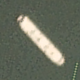

In [31]:
img_file = Image.open(file)
img_file

In [ ]:
img_grey = img_file.convert('L')

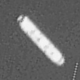

In [54]:
img_grey

In [80]:
getdat = img_grey.load()
getdat[0,1]

79

In [58]:
value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))

In [86]:
value

array([[84, 87, 88, ..., 84, 87, 88],
       [79, 88, 90, ..., 79, 84, 86],
       [81, 86, 87, ..., 83, 88, 85],
       ...,
       [89, 89, 83, ..., 87, 89, 90],
       [92, 88, 83, ..., 90, 90, 89],
       [94, 92, 89, ..., 89, 92, 89]])

In [87]:
len(value)

80

In [88]:
value = value.flatten()

In [89]:
value

array([84, 87, 88, ..., 89, 92, 89])

In [90]:
len(value)

6400

In [43]:
pix = img_file.load()
pix[0,0]

(78, 89, 75)

In [75]:
datos_imagen = []

for w in range(img_grey.size[0]):
    for h in range(img_grey.size[1]):
        datos_imagen.append(getdat[w,h])

In [92]:
datos_imagen

[84,
 79,
 81,
 90,
 95,
 82,
 76,
 87,
 87,
 86,
 85,
 84,
 88,
 89,
 89,
 90,
 86,
 87,
 89,
 91,
 87,
 86,
 87,
 87,
 85,
 84,
 83,
 86,
 87,
 87,
 86,
 88,
 81,
 79,
 84,
 84,
 85,
 85,
 82,
 83,
 84,
 84,
 84,
 95,
 95,
 86,
 86,
 88,
 88,
 87,
 85,
 86,
 86,
 85,
 82,
 85,
 86,
 85,
 87,
 89,
 91,
 86,
 86,
 88,
 89,
 87,
 85,
 83,
 81,
 89,
 90,
 91,
 95,
 92,
 86,
 86,
 90,
 89,
 92,
 94,
 87,
 88,
 86,
 92,
 91,
 84,
 80,
 81,
 85,
 87,
 85,
 85,
 87,
 88,
 89,
 88,
 85,
 84,
 84,
 88,
 89,
 90,
 85,
 86,
 86,
 85,
 83,
 84,
 85,
 85,
 86,
 87,
 89,
 90,
 87,
 86,
 87,
 87,
 83,
 83,
 87,
 84,
 81,
 85,
 89,
 90,
 89,
 88,
 87,
 88,
 87,
 87,
 88,
 88,
 88,
 88,
 85,
 85,
 86,
 88,
 92,
 91,
 91,
 92,
 91,
 86,
 89,
 93,
 84,
 89,
 92,
 92,
 93,
 91,
 91,
 91,
 93,
 89,
 88,
 92,
 88,
 90,
 87,
 89,
 90,
 89,
 87,
 82,
 85,
 89,
 87,
 87,
 86,
 85,
 88,
 87,
 85,
 86,
 85,
 86,
 88,
 91,
 84,
 85,
 88,
 85,
 83,
 84,
 85,
 86,
 86,
 86,
 88,
 92,
 88,
 86,
 90,
 89,
 86,
 92,


In [93]:
len(datos_imagen)

6400

In [72]:
pix = img_grey.load()
pix[0,0][0]

TypeError: 'int' object is not subscriptable

78

In [50]:
datos_imagen = []
datos_imagen.append(getdat[0][0])

In [51]:
datos_imagen

[78]

In [ ]:
value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))

In [102]:
varx = 0
for file in myFileList:
    
    target = file.split('/')
    name = target[4]
    target_class =  int(target[4].split('__')[0])
    
    print(name,target_class)
    img_file = Image.open(file)
    if varx == 0:
        img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    if varx == 0:
        img_grey.show()
    #img_grey.save('result.png')
    #img_grey.show()
    
    varx = varx+1

    # Save Greyscale values
    
    pix = img_grey.load()
    datos_imagen = []

    for w in range(img_grey.size[0]):
        for h in range(img_grey.size[1]):
            datos_imagen.append(pix[w,h])
    
    #value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    datos_imagen.append(target_class)
    datos_imagen.append(name)

    #value = value.flatten()
    
    #print(value)
    with open("test.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(datos_imagen)

1__20180708_180453_0f28__-118.22546866395027_33.737983155799235.png 1
0__20170501_180611_100e__-122.48838321726191_37.67210938612325.png 0
0__20161018_192055_0d05__-122.34538215222926_37.73270120838732.png 0
1__20170618_180802_0f34__-122.32751841561911_37.708968116907286.png 1
1__20170910_181216_1010__-122.35188051380415_37.74882559310978.png 1
1__20180205_181811_1030__-122.39782230108867_37.798740586411384.png 1
1__20170129_181027_0e1f__-122.3203380656004_37.71630873809904.png 1
0__20170730_191231_0f21__-122.34184325361097_37.751717265244366.png 0
0__20180712_180755_0f2d__-118.1509285019418_33.736157292984934.png 0
0__20170430_181117_0e26__-122.28903227894936_37.76160433354677.png 0
1__20170717_180818_1010__-122.33908910143056_37.73975043117767.png 1
0__20170721_180825_100b__-122.42091671358793_37.75188895390692.png 0
0__20180131_175841_1010__-118.14724396474439_33.726965541492056.png 0
0__20180706_180914_1051__-118.16578607470981_33.728496393505175.png 0
0__20170615_181425_0e0d__-122

1__20180712_180755_0f2d__-118.16439790473636_33.72880710541674.png 1
1__20180712_211331_0f06__-118.22738065850888_33.72898172505942.png 1
0__20170731_181111_100c__-122.31782681890151_37.77113012761632.png 0
0__20170902_190520_0f53__-122.1641647583269_37.75018552446086.png 0
0__20161006_004005_0c38__-122.36565907133564_37.810144566440925.png 0
1__20161102_202001_0c75__-122.33546468872845_37.756683756597916.png 1
0__20170502_180546_1044__-122.2985487817661_37.71320676479129.png 0
1__20180708_182359_1032__-122.32606722895265_37.700090847100654.png 1
0__20170903_181304_1041__-122.3482784305868_37.73631350759759.png 0
0__20170902_190521_0f53__-122.1586766078943_37.837806641108486.png 0
0__20170620_180742_102f__-122.33851414609958_37.73931457485703.png 0
0__20170827_181129_1014__-122.34360894296053_37.817783987460864.png 0
0__20161006_002711_1_0c1b__-122.27072925839249_37.769901689689796.png 0
1__20161102_202001_0c75__-122.34142381191572_37.74909210060885.png 1
1__20170713_180939_1002__-122.

0__20170419_181314_0e0d__-122.45993190878904_37.77221861331352.png 0
0__20170716_180815_103a__-122.33035950773082_37.81295052895617.png 0
0__20171023_184815_0f21__-118.21662601681271_33.72638260030187.png 0
0__20180713_180403_1035__-118.22552852932506_33.721695116347796.png 0
0__20161022_180611_0e19__-122.26046365262594_37.78143751316057.png 0
0__20180708_180454_0f28__-118.2203707788372_33.69812660369636.png 0
0__20170419_180520_1009__-122.45953944046384_37.699723616333564.png 0
0__20170211_181116_0e16__-122.34955395727619_37.738402592072184.png 0
0__20180711_180503_1027__-118.22011468436393_33.70061825831157.png 0
0__20180705_182236_0f4d__-122.33261834104384_37.75128683801146.png 0
0__20170129_181027_0e1f__-122.32641053028124_37.737353268295664.png 0
0__20180708_180453_0f28__-118.27748077799673_33.7862635343534.png 0
0__20180712_180428_101b__-118.19464573278503_33.78281868724851.png 0
0__20170706_181011_1006__-122.43919822115103_37.865325923311175.png 0
0__20180205_181922_1031__-122.4

0__20180705_182235_0f4d__-122.33608431310152_37.69492902604652.png 0
0__20170705_180816_103e__-122.29933622070351_37.74884941066563.png 0
0__20171129_181544_1022__-122.12992029491322_37.74323199651593.png 0
0__20170731_181110_100c__-122.24657378000313_37.810659846631175.png 0
0__20170615_181426_0e0d__-122.18341732165851_37.708761164772326.png 0
0__20160710_182139_0c78__-122.37082830214578_37.75117253740744.png 0
0__20170624_180910_100c__-122.56584604831254_37.80569867166211.png 0
1__20180205_181811_1030__-122.34423745384966_37.750540877374135.png 1
1__20170702_181120_103a__-122.32570961605553_37.72829104311612.png 1
1__20171127_181538_101e__-122.35285080613363_37.7859829726792.png 1
0__20170731_181112_100c__-122.26453525687617_37.67984902519703.png 0
0__20170730_181514_0e20__-122.31290232802994_37.658968634398896.png 0
0__20170721_180823_100b__-122.31718995202574_37.829233547081834.png 0
1__20180205_181812_1030__-122.33525851672547_37.73023804026718.png 1
0__20170919_181710_0e20__-122.

1__20170622_180819_1034__-122.31765748191476_37.70796507635255.png 1
0__20171119_181612_0f52__-122.32920768462218_37.73677435185076.png 0
1__20170620_180742_102f__-122.33746157633949_37.73898418986875.png 1
0__20170211_181115_0e16__-122.46760043032178_37.804890041697504.png 0
0__20170419_181314_0e0d__-122.33129612995508_37.75063039832084.png 0
0__20170609_180756_103a__-122.47847525154941_37.818917997641144.png 0
0__20170910_181216_1010__-122.45550601215784_37.75794844294166.png 0
0__20170713_180938_1002__-122.11497923392102_37.77694652976011.png 0
0__20161218_180846_0e26__-122.41511264989016_37.69315727796003.png 0
1__20171025_175648_0e26__-118.22893579949042_33.71995675330757.png 1
0__20170615_181426_0e0d__-122.4384750460101_37.75373148445022.png 0
0__20171118_181531_1030__-122.33652064573847_37.764287762127.png 0
0__20170730_181044_103d__-122.29846603385391_37.6786496844103.png 0
1__20170923_181240_0f42__-122.35006644090872_37.781019461942165.png 1
0__20161218_180845_0e26__-122.28913

0__20180711_180503_1027__-118.22379031580954_33.738378581127954.png 0
0__20170620_232624_0c79__-122.39590954307717_37.67778299970322.png 0
1__20170613_180813_1017__-122.34781567268976_37.73860930267714.png 1
1__20170106_180851_0e30__-122.34968094303304_37.77058016750495.png 1
0__20171210_181628_100a__-122.51002030766956_37.728768577513684.png 0
0__20170414_180529_0f28__-122.40460424474676_37.78165918033301.png 0
0__20170613_180813_1017__-122.503843676101_37.710545002152834.png 0
1__20170910_181215_1010__-122.35000422761132_37.78034313695685.png 1
0__20170502_180546_1044__-122.25682086658408_37.73693505174775.png 0
0__20170609_180756_103a__-122.33747868524297_37.73706448518304.png 0
0__20170721_180937_0f31__-122.37899926016429_37.71065656886824.png 0
0__20171208_181656_0e2f__-122.11416992882342_37.75912177804362.png 0
1__20171118_185722_0f2d__-122.33606293980446_37.7583365292858.png 1
1__20171117_185444_104c__-122.34651124917606_37.728191877515975.png 1
1__20170709_181332_0e0e__-122.360

0__20170427_180608_1041__-122.3761535265925_37.70907324730817.png 0
1__20170501_180617_1005__-122.40480506252185_37.816081172987026.png 1
0__20170619_180826_1032__-122.32686885025684_37.70928888497462.png 0
0__20171218_181725_1007__-122.49746212667813_37.68783156562872.png 0
1__20171119_181612_0f52__-122.3417050874871_37.74809321393093.png 1
0__20171107_181615_0f22__-122.44032738249221_37.74744008650234.png 0
0__20170901_181521_0e14__-122.572150913354_37.722899458090765.png 0
1__20180707_182444_0f17__-122.33857705597859_37.7092740295826.png 1
0__20170827_181129_1014__-122.37751490782234_37.79849983979977.png 0
0__20180206_181844_0f34__-122.42666746894474_37.809808357150175.png 0
0__20170403_180411_100f__-122.04553631400232_37.70404824656662.png 0
0__20180712_180429_101b__-118.11031805511216_33.680712495587024.png 0
1__20170618_180801_0f34__-122.34602584563679_37.760149794821125.png 1
0__20170716_180834_101b__-122.63551629574572_37.78257269367165.png 0
0__20170902_190520_0f53__-122.2501

0__20170723_180812_1005__-122.14001168126084_37.65672620334604.png 0
0__20170515_180653_1007__-122.34209119981521_37.75063707378376.png 0
1__20170909_181400_0f28__-122.34108913318198_37.71769740002228.png 1
0__20180705_182235_0f4d__-122.33029320161329_37.740998676103544.png 0
1__20180210_181908_1006__-122.35609704801801_37.76131386622846.png 1
1__20180705_213443_0f02__-122.3569645414462_37.790926638689484.png 1
0__20170615_181425_0e0d__-122.25417988306033_37.769392519458926.png 0
0__20170226_180944_0e26__-122.2755977944286_37.766659973494164.png 0
1__20171129_181544_1022__-122.3364672628105_37.758825514797536.png 1
0__20170805_180925_1001__-122.21492622085995_37.71911495017346.png 0
0__20170925_181359_103e__-122.33791687795384_37.7681351984238.png 0
0__20180712_180429_101b__-118.22717337015905_33.723518561164134.png 0
0__20180705_182236_0f4d__-122.35771797943889_37.79441880887758.png 0
1__20170613_180813_1017__-122.32641024925597_37.70731237736626.png 1
1__20170905_181214_0f12__-122.34

1__20170609_180751_101b__-122.32675050227115_37.73740928946283.png 1
1__20170619_180817_0f3f__-122.34595582754021_37.76036572112739.png 1
0__20170709_181333_0e0e__-122.32366700707382_37.71705794957847.png 0
0__20170612_180826_1036__-122.4049351044148_37.8211111157105.png 0
1__20180712_180428_101b__-118.20501972925084_33.729986586486476.png 1
0__20170314_155238_0c12__-122.45523340881503_37.75332342581616.png 0
0__20170702_180943_103c__-122.32587394364705_37.728940930361865.png 0
0__20170712_180940_0f15__-122.30831117987992_37.7394927198157.png 0
0__20170414_180530_0f28__-122.41579497567784_37.71027680036109.png 0
0__20161116_180804_0e14__-122.48298739296371_37.684929808845375.png 0
0__20161006_002711_1_0c1b__-122.31250467028002_37.76466384872186.png 0
1__20180710_180333_1002__-118.20973459261748_33.70599621698435.png 1
1__20171023_184815_0f21__-118.21694562064921_33.73755340598831.png 1
0__20180711_182156_1048__-122.34803963545875_37.73636626601002.png 0
0__20170620_232624_0c79__-122.33

0__20170723_180811_1005__-122.1300870503555_37.743530657430036.png 0
0__20170620_232624_0c79__-122.33282343422619_37.72843967762435.png 0
0__20170702_181120_103a__-122.33867933045343_37.73988333005278.png 0
1__20170713_180939_1002__-122.34601226092937_37.757824334030936.png 1
1__20170622_180819_1034__-122.32978378407111_37.73707506277014.png 1
1__20170724_181036_1011__-122.34540497671433_37.757172017590726.png 1
0__20170716_180833_101b__-122.40700928865517_37.81322613595979.png 0
0__20170703_180945_1009__-122.43982886368555_37.75484654657575.png 0
1__20170504_180549_1025__-122.34170656308858_37.751770580625916.png 1
0__20180209_181715_103e__-122.21976402071296_37.73169331592152.png 0
0__20170129_181027_0e1f__-122.47175565889664_37.79087532868833.png 0
1__20180305_184041_1054__-122.33639427812646_37.73649055664562.png 1
0__20170504_180549_1025__-122.3309286965616_37.73848761798742.png 0
1__20170919_181711_0e20__-122.32706793158978_37.73619432730002.png 1
0__20170502_180546_1044__-122.21

0__20171023_181359_1044__-122.33186431507528_37.71772660000652.png 0
0__20170730_181042_103d__-122.15948899608844_37.75712835888534.png 0
0__20161006_004004_0c38__-122.34609489801724_37.72908187232048.png 0
1__20170522_180635_0f42__-122.34764717161039_37.75780635583718.png 1
0__20170703_180944_1009__-122.21066129429391_37.777761556061435.png 0
0__20170702_181120_103a__-122.34798021544444_37.739259159989395.png 0
1__20170730_181513_0e20__-122.34331780198168_37.75056279629343.png 1
0__20171217_181637_1032__-122.32090286486363_37.71782620594539.png 0
0__20170919_181412_0f1b__-122.3456078799585_37.75733538064984.png 0
1__20170620_180742_102f__-122.32912080463271_37.73885589412447.png 1
0__20180707_180451_102e__-118.159098314879_33.73443046184525.png 0
0__20170721_180936_0f31__-122.58174348336024_37.85715788965597.png 0
0__20180206_181844_0f34__-122.48196252032389_37.797896806606666.png 0
0__20170919_181413_0f1b__-122.2408886891324_37.66999197387337.png 0
0__20170721_180937_0f31__-122.48441

0__20170910_181215_1010__-122.28183181529016_37.77362017189143.png 0
0__20170430_181117_0e26__-122.22926548629258_37.7215619933749.png 0
0__20170624_180910_100c__-122.45368190995994_37.82994576444275.png 0
0__20170501_181319_0e1f__-122.40559373689004_37.81549029342611.png 0
0__20170705_180815_103e__-122.20020321255956_37.758763660621604.png 0
0__20171127_181539_101e__-122.34128330155553_37.71883414590085.png 0
0__20170830_181003_0f4e__-122.31128750121539_37.7710380107863.png 0
0__20170917_190707_0f44__-122.3946224097109_37.7732801999603.png 0
0__20171206_181520_1042__-122.05541478577827_37.71405115408795.png 0
1__20170618_180801_0f34__-122.34834288305811_37.74061313831539.png 1
0__20170830_181004_0f4e__-122.17832386203119_37.71694572920158.png 0
0__20170715_180932_101a__-122.17080084136832_37.70172399788643.png 0
0__20170708_180811_100c__-122.19500832891812_37.757295215693325.png 0
0__20161006_003958_0c12__-122.41531011860283_37.70267624304593.png 0
0__20161102_202000_0c75__-122.316295

1__20180705_182235_0f4d__-122.33513153134916_37.72920982375914.png 1
0__20170226_180944_0e26__-122.32333085816974_37.727817741497745.png 0
0__20170708_180827_1021__-122.32747522682342_37.71751236744004.png 0
0__20170328_181231_0e0f__-122.33371894647505_37.72728204448836.png 0
0__20161218_180844_0e26__-122.50445615668501_37.884005199396206.png 0
0__20180209_184353_0f21__-122.50306563639336_37.72511614594456.png 0
1__20180705_213443_0f02__-122.35037798905033_37.749304030630014.png 1
0__20180706_180914_1051__-118.2167882213538_33.71263673990788.png 0
1__20170705_180816_103e__-122.33775236322533_37.767485330458406.png 1
1__20170618_180801_0f34__-122.33912411032087_37.73964246969732.png 1
0__20170419_180520_1009__-122.22904268352583_37.677351018498186.png 0
1__20171129_181545_1022__-122.342773203759_37.7505327212711.png 1
1__20180712_180429_101b__-118.13631720546866_33.698820150132214.png 1
0__20161116_180804_0e14__-122.48511662999387_37.706679141620796.png 0
0__20170721_180936_0f31__-122.5

0__20170901_181520_0e14__-122.35963864537221_37.79296914588649.png 0
0__20170921_181406_1031__-122.33962892623596_37.747973442012324.png 0
0__20170328_181230_0e0f__-122.49692341896102_37.822783730849416.png 0
0__20171206_185105_0f29__-122.07047584004849_37.72087656139146.png 0
0__20170419_181315_0e0d__-122.51003723124383_37.726199875950385.png 0
0__20180707_182443_0f17__-122.33361968797698_37.74975125892696.png 0
0__20170910_181216_1010__-122.42511841363877_37.77221615214605.png 0
1__20170619_181346_0e30__-122.34814310125861_37.740098284028186.png 1
1__20161103_195523_0c27__-122.34122333720889_37.748658349763815.png 1
0__20170106_180850_0e30__-122.20387899170765_37.76852263628334.png 0
1__20170622_180819_1034__-122.330577469813_37.716989232692164.png 1
1__20180709_182125_0e20__-122.33588782606881_37.75887632967759.png 1
1__20180709_182127_0e20__-122.34115696827755_37.7177248186803.png 1
0__20180708_180909_0f47__-118.22976104034689_33.72787581870198.png 0
0__20170502_180545_1044__-122.3

1__20180205_181812_1030__-122.34903070619661_37.73983279484131.png 1
0__20171114_181404_1027__-122.10457147525985_37.76429479602058.png 0
1__20180707_182443_0f17__-122.34386287818887_37.75053879266054.png 1
1__20171118_185722_0f2d__-122.34586056213097_37.759581050926116.png 1
0__20170717_180817_1010__-122.47882641669119_37.822299457731454.png 0
0__20161202_180735_0e30__-122.33342895873801_37.74823597436849.png 0
0__20171217_181637_1032__-122.34385911119686_37.758677625704856.png 0
0__20170328_181231_0e0f__-122.34837179935694_37.737314484146694.png 0
0__20170605_180824_1032__-122.51065776881715_37.792233058893466.png 0
0__20170721_180825_100b__-122.2268614982417_37.70394360444157.png 0
0__20160905_193458_0c37__-122.340008531414_37.74740774072642.png 0
0__20161212_180855_0e30__-122.48033582713121_37.8452353581721.png 0
1__20161116_180803_0e14__-122.32544610911427_37.7273161143406.png 1
0__20170419_180519_1009__-122.19726890753822_37.737193475956445.png 0
1__20170719_180901_101d__-122.339

0__20180714_182329_101d__-122.12723744450155_37.78320283988516.png 0
0__20161218_180845_0e26__-122.33640059989305_37.758662903328286.png 0
0__20170620_232624_0c79__-122.47375955485923_37.642598500918425.png 0
0__20170708_180827_1021__-122.32351807475574_37.718463150184384.png 0
0__20170414_180529_0f28__-122.2486414407537_37.75456688788033.png 0
0__20170721_180826_100b__-122.38435988783581_37.68802542433647.png 0
0__20161218_180845_0e26__-122.5166757517887_37.77330323976371.png 0
0__20170403_180411_100f__-122.19825012992396_37.72197704303625.png 0
0__20170805_180925_1001__-122.1615560941348_37.68557019378132.png 0
0__20180709_182125_0e20__-122.34297297520517_37.7510475836675.png 0
0__20161018_193328_0c45__-122.37991888157113_37.73507814459864.png 0
0__20170414_180529_0f28__-122.48113009163224_37.79024100162724.png 0
0__20170617_180854_1031__-122.47157916689906_37.84433113894968.png 0
0__20170414_180530_0f28__-122.49530666035895_37.70464113581292.png 0
1__20170731_181111_100c__-122.33710

0__20171207_181551_103c__-122.33227218978708_37.748121268952815.png 0
0__20170522_180636_0f42__-122.30781601464751_37.69757859579031.png 0
0__20170226_180945_0e26__-122.06194784464572_37.6493713763594.png 0
0__20170917_190614_0f3c__-122.25015237777586_37.69930803868019.png 0
0__20171023_175305_1039__-118.19528360412191_33.71206211664979.png 0
0__20180709_182127_0e20__-122.3237919540068_37.72952387410005.png 0
0__20161218_180844_0e26__-122.5253411209817_37.835177499797524.png 0
0__20171022_175534_100e__-118.16431999812811_33.72783383138906.png 0
0__20170905_181214_0f12__-122.33626482859653_37.728107591199006.png 0
1__20170211_181116_0e16__-122.34839683992097_37.73834212222343.png 1
0__20170501_180552_1018__-122.2878517904958_37.78525652072115.png 0
0__20170721_180936_0f31__-122.34886401982776_37.766627914781374.png 0
0__20180206_184438_1043__-122.46484486751214_37.67652059594143.png 0
1__20170505_181258_0e2f__-122.3419813806201_37.75150172136352.png 1
1__20180203_181746_1035__-122.32385

0__20160622_170157_0c64__-122.4478291812287_37.892486779170426.png 0
0__20170703_180945_1009__-122.34432039620907_37.72955872654355.png 0
0__20170519_181144_0e26__-122.26446206109628_37.79049360927668.png 0
1__20170609_180751_101b__-122.34317966086316_37.727659611082416.png 1
0__20161218_180844_0e26__-122.43570635251734_37.81780153646771.png 0
0__20170905_181212_0f12__-122.34308091285969_37.804288520479616.png 0
0__20161116_180803_0e14__-122.32415646123718_37.726876095974376.png 0
1__20170515_180654_1007__-122.34392970462561_37.73139523823038.png 1
0__20170519_181145_0e26__-122.24071243123323_37.737319095480515.png 0
0__20170909_181359_0f28__-122.33213492997012_37.79746718349902.png 0
0__20170226_180945_0e26__-122.30624065997664_37.64384143506762.png 0
0__20170715_180932_101a__-122.25033803846632_37.697767967800296.png 0
0__20170414_180529_0f28__-122.39205795318713_37.795249956868204.png 0
0__20170403_180411_100f__-122.22541037520634_37.728918465509594.png 0
1__20171107_181615_0f22__-1

0__20170725_181220_103a__-122.64678260192157_37.83487426674481.png 0
0__20170419_181315_0e0d__-122.4077485752172_37.733409605566.png 0
0__20180710_180333_1002__-118.23008286528928_33.72773733537344.png 0
0__20161212_180855_0e30__-122.56000238103881_37.89447369732887.png 0
0__20170211_181116_0e16__-122.32846942046908_37.735580412683404.png 0
1__20171023_175305_1039__-118.10923630341375_33.67963996316044.png 1
0__20171023_175304_1039__-118.22159323440394_33.731879952583874.png 0
0__20180712_180755_0f2d__-118.19999297765584_33.75966141511539.png 0
0__20180712_211331_0f06__-118.1823711174239_33.733668673347715.png 0
1__20161011_185736_0c72__-122.35168603891846_37.78281297621249.png 1
1__20170702_180943_103c__-122.35179094732001_37.7512856871828.png 1
0__20170515_180653_1007__-122.27673446632457_37.77934834137929.png 0
0__20170909_181400_0f28__-122.3245035056439_37.726148019081435.png 0
0__20170910_181216_1010__-122.37622318019483_37.70888433840797.png 0
0__20170730_181044_103d__-122.333954

0__20180708_180453_0f28__-118.21796142086208_33.72693760327861.png 0
1__20180705_182236_0f4d__-122.33953638448827_37.769874802316046.png 1
0__20170715_180931_101a__-122.24654690410685_37.756256987681354.png 0
0__20170901_181520_0e14__-122.35077095526808_37.78226715228304.png 0
1__20171127_181539_101e__-122.32971449979756_37.71076523356743.png 1
0__20170618_180802_0f34__-122.3326389245265_37.71865033146975.png 0
0__20170106_180851_0e30__-122.33658489325548_37.7609082068482.png 0
0__20170709_181333_0e0e__-122.37973618102146_37.748813242944706.png 0
0__20180712_180428_101b__-118.20413233546023_33.72904829614318.png 0
1__20170419_181315_0e0d__-122.33515203635797_37.73072415039726.png 1
1__20171119_181612_0f52__-122.33606318146319_37.75830949129269.png 1
0__20171129_181545_1022__-122.33008108461468_37.71163258300953.png 0
0__20170718_180714_102f__-122.11363084629862_37.63287134743483.png 0
0__20170614_180813_100b__-122.42776336257577_37.703007735122235.png 0
1__20161102_180658_0e26__-122.33

0__20170821_175214_101d__-118.28264453650422_33.737050666114996.png 0
0__20170805_180925_1001__-122.06884314323169_37.72621741151038.png 0
1__20170830_181004_0f4e__-122.34726997279913_37.738714439896754.png 1
1__20180705_182235_0f4d__-122.32053495342223_37.70965814653878.png 1
0__20180206_181844_0f34__-122.35203237112222_37.77045792435535.png 0
0__20170820_174930_1002__-118.032868622865_33.753326864892585.png 0
0__20170703_180944_1009__-122.3781456215884_37.80455995471527.png 0
0__20170910_181216_1010__-122.32554529125335_37.727641155597524.png 0
1__20170617_181433_0e0f__-122.32525014183037_37.73015413754748.png 1
1__20170613_180813_1017__-122.35037964364578_37.749114763841334.png 1
1__20180714_182155_1051__-122.33328806319655_37.718383608981874.png 1
0__20170619_181346_0e30__-122.33265992148048_37.75044885256333.png 0
0__20180712_180755_0f2d__-118.17975975093874_33.73215147684908.png 0
0__20170427_180608_1041__-122.44316427295229_37.723307164781865.png 0
0__20171127_181538_101e__-122.

0__20170621_181251_0e26__-122.18322353830067_37.78217118796121.png 0
1__20170707_174131_0c0b__-122.33822673709459_37.73717684513958.png 1
1__20171129_181545_1022__-122.34076267101332_37.719966896346506.png 1
0__20170505_181257_0e2f__-122.25410703345659_37.76647182574472.png 0
0__20170708_180826_1021__-122.40442519385122_37.80821084595821.png 0
0__20170619_180824_1032__-122.46519177865702_37.85060241699559.png 0
0__20161103_195523_0c27__-122.44450877236157_37.68456556040708.png 0
0__20170708_180827_1021__-122.39602476916264_37.70552635983435.png 0
0__20170819_175035_0f22__-118.11963345188354_33.720238535155865.png 0
0__20170702_180943_103c__-122.34181116013261_37.720729861706594.png 0
1__20180210_181908_1006__-122.35282451856958_37.78509053291386.png 1
0__20170901_181520_0e14__-122.36718749683108_37.8027710916015.png 0
0__20171204_185513_0f3c__-122.45353007239848_37.67925381823352.png 0
0__20160704_204236_0c41__-122.19041500809534_37.8972978006019.png 0
0__20160710_182140_0c78__-122.288

0__20170717_180818_1010__-122.33494840950328_37.719231212430834.png 0
0__20170708_180811_100c__-122.1659155832246_37.72161750419214.png 0
1__20171127_181539_101e__-122.34707500910532_37.729898490055696.png 1
1__20170419_180520_1009__-122.33850981521253_37.7398012605276.png 1
0__20170622_180819_1034__-122.33884846521858_37.73617987416077.png 0
0__20170712_180940_0f15__-122.30200855168509_37.77612086869213.png 0
0__20180714_182155_1051__-122.34293454946659_37.71686947358873.png 0
0__20171127_185539_1_0f29__-122.34670953887169_37.74049593906109.png 0
0__20170430_181117_0e26__-122.15210322199844_37.72389841995879.png 0
0__20170101_180916_0e30__-122.47922633032526_37.82359910990126.png 0
0__20171212_181755_0e26__-122.282908930589_37.76437931512033.png 0
0__20180708_180453_0f28__-118.15243406114678_33.734925737760754.png 0
0__20170414_180530_0f28__-122.48157524434309_37.711828217436924.png 0
0__20180705_182235_0f4d__-122.33939672906811_37.739616958453816.png 0
0__20161103_195402_1_0c24__-122

0__20170730_181044_103d__-122.31695364730558_37.68081322489661.png 0
0__20171020_175308_0f52__-118.13725879609184_33.72359475151644.png 0
0__20170902_190520_0f53__-122.06594120117501_37.762102203367.png 0
0__20170619_181346_0e30__-122.34514251553766_37.759901535462234.png 0
0__20170226_180944_0e26__-122.32915203580251_37.7353950234154.png 0
0__20171026_184638_1043__-118.15305164690815_33.69877330797616.png 0
1__20170712_180940_0f15__-122.3445569320588_37.7567887529766.png 1
0__20170917_190707_0f44__-122.38347740708222_37.76578659010064.png 0
1__20170719_180901_101d__-122.3300199396251_37.748649275464146.png 1
0__20170415_180503_1024__-122.39549008880205_37.75038226821369.png 0
0__20161116_180803_0e14__-122.51630673753371_37.75150784739819.png 0
0__20170909_181400_0f28__-122.32484462928555_37.77479380802847.png 0
0__20170712_181003_0f12__-122.06765502383297_37.75038088488909.png 0
0__20180711_182157_1048__-122.34570599792265_37.757795594734425.png 0
0__20170106_180852_0e30__-122.4205197

1__20170616_180825_100e__-122.35671008041938_37.76131721414209.png 1
0__20180712_180429_101b__-118.12463705355718_33.66691963368276.png 0
0__20160905_193458_0c37__-122.41812939109248_37.694659388872736.png 0
1__20180713_180403_1035__-118.12123646860904_33.67915287138419.png 1
1__20170723_180812_1005__-122.32579167236734_37.72675026209499.png 1
0__20161218_180846_0e26__-122.49935560861145_37.70985003596194.png 0
0__20180205_181811_1030__-122.35150200657927_37.753176855917566.png 0
1__20170705_180816_103e__-122.33222866289329_37.7491755586813.png 1
1__20180707_182443_0f17__-122.35847178421098_37.793936209972244.png 1
0__20170701_181015_1042__-122.36505220565711_37.865057573726304.png 0
0__20180205_181811_1030__-122.48198159034642_37.79516591513236.png 0
0__20170730_181511_0e20__-122.38922871634075_37.84501438737822.png 0
0__20170811_191957_0c1b__-122.37765392824012_37.79817610353768.png 0
0__20170819_175035_0f22__-118.18393344739283_33.73424892757211.png 0
1__20180708_180453_0f28__-118.2

In [103]:
data_train = pd.read_csv('train.csv')

In [104]:
data_train.shape

(0, 6402)

In [105]:
data_train.head()

Empty DataFrame
Columns: [P0, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21, P22, P23, P24, P25, P26, P27, P28, P29, P30, P31, P32, P33, P34, P35, P36, P37, P38, P39, P40, P41, P42, P43, P44, P45, P46, P47, P48, P49, P50, P51, P52, P53, P54, P55, P56, P57, P58, P59, P60, P61, P62, P63, P64, P65, P66, P67, P68, P69, P70, P71, P72, P73, P74, P75, P76, P77, P78, P79, P80, P81, P82, P83, P84, P85, P86, P87, P88, P89, P90, P91, P92, P93, P94, P95, P96, P97, P98, P99, ...]
Index: []

[0 rows x 6402 columns]

In [106]:
data_test = pd.read_csv('test.csv')

In [107]:
data_test.shape

(4000, 6402)

In [108]:
data_test.head()

P0   P1   P2  P3  P4   P5   P6   P7   P8   P9  ...  P6392  P6393  P6394  \
0   84   79   81  90  95   82   76   87   87   86  ...     91     89     88   
1  104  101  110  86  89  104  135  161  180  181  ...    142    141    144   
2   88   89   89  87  86   89   89   87   87   88  ...     88     87     87   
3   46   47   43  45  45   32   35   42   47   46  ...     46     47     48   
4   96   93   93  95  98   97   94   92   94   96  ...     96     96     96   

   P6395  P6396  P6397  P6398  P6399  target_class  \
0     88     89     90     89     89             1   
1    142    138    138    136    130             0   
2     89     87     87     88     92             0   
3     51     49     46     47     49             1   
4     96     95     99    100    100             1   

                                                name  
0  1__20180708_180453_0f28__-118.22546866395027_3...  
1  0__20170501_180611_100e__-122.48838321726191_3...  
2  0__20161018_192055_0d05__-122.34538215222926_3...  
3  1__20170618_180802_0f34__-122.32751841561911_3...  
4  1__20170910_181216_1010__-122.35188051380415_3...  

[5 rows x 6402 columns]

In [110]:
data_test.sample(10)

P0   P1   P2   P3   P4   P5   P6   P7   P8   P9  ...  P6392  P6393  \
1215   91  101  106  103  101   91   89   87   87   89  ...    105    104   
1036  107  100   97  103  105  106  106  103  106  104  ...    103    105   
3405  131  134  126  131  142  157  164  166  153  134  ...    123    120   
283    68   68   65   68   67   63   64   59   57   64  ...     73     70   
3431   84   85   90   92   92   91   88   89   89   88  ...     92     93   
2907  140  135  134  136  137  137  129  127  133  135  ...    131    130   
3915   82   80   80   82   82   81   79   80   86   91  ...     83     86   
813    41   43   42   40   39   42   42   40   41   41  ...     37     41   
3172   70   72   67   66   68   71   72   70   71   72  ...     71     74   
2458   53   58   67   64   60   56   57   56   57   57  ...    129    117   

      P6394  P6395  P6396  P6397  P6398  P6399  target_class  \
1215    120    137    128    116    119    109             0   
1036    105    105    105    106    107    104             1   
3405    116    124    119    133    145    152             0   
283      71     71     69     66     69     71             1   
3431     96     94     94     91     85     88             0   
2907    127    129    131    133    131    131             0   
3915     89     88     83     86     88     88             0   
813      42     40     40     40     40     40             1   
3172     78     77     72     72     70     64             0   
2458    112    110     99    104    108    107             0   

                                                   name  
1215  0__20170917_190708_0f44__-122.46542905557355_3...  
1036  1__20180210_181908_1006__-122.34123392601467_3...  
3405  0__20170717_180817_1010__-122.27858245549322_3...  
283   1__20170730_181043_103d__-122.3432837496435_37...  
3431  0__20170709_181334_0e0e__-122.18935032957172_3...  
2907  0__20170129_181027_0e1f__-122.29808404678268_3...  
3915  0__20171118_181532_1030__-122.3349943941654_37...  
813   1__20170707_174131_0c0b__-122.34742586055928_3...  
3172  0__20170716_180815_103a__-122.33498831709183_3...  
2458  0__20161102_180658_0e26__-122.28126318568829_3...  

[10 rows x 6402 columns]

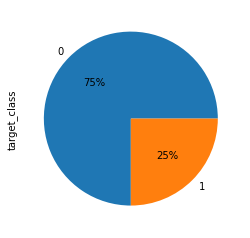

In [112]:
data_test.target_class.value_counts().plot.pie(autopct='%1.0f%%', figsize=(4,4))

In [139]:
PICTURE_SIZE = 80
CHANNELS = 'N'

INPUT_COLUMNS = []
INPUT_COLUMNS = [x for x in data_test.columns if x not in ["target_class","name"]]

In [160]:
def show_images(samples, title='file'):
    for index, sample in samples.iterrows():
        if  title is not None:
            if isinstance(title, str):
                title = [title, ]
            title_text = ', '.join(str(sample[title_field]) for title_field in title)
            plt.title(title_text)
            
        sample_as_grid = sample[INPUT_COLUMNS].values.reshape(PICTURE_SIZE, PICTURE_SIZE).astype(np.float)
        #sample_as_grid = np.transpose(sample_as_grid, (1,2,0)) / 100
        plt.axis('off')
        plt.imshow(sample_as_grid)
        plt.show()

In [161]:
data_test.head(5)

P0   P1   P2  P3  P4   P5   P6   P7   P8   P9  ...  P6392  P6393  P6394  \
0   84   79   81  90  95   82   76   87   87   86  ...     91     89     88   
1  104  101  110  86  89  104  135  161  180  181  ...    142    141    144   
2   88   89   89  87  86   89   89   87   87   88  ...     88     87     87   
3   46   47   43  45  45   32   35   42   47   46  ...     46     47     48   
4   96   93   93  95  98   97   94   92   94   96  ...     96     96     96   

   P6395  P6396  P6397  P6398  P6399  target_class  \
0     88     89     90     89     89             1   
1    142    138    138    136    130             0   
2     89     87     87     88     92             0   
3     51     49     46     47     49             1   
4     96     95     99    100    100             1   

                                                name  
0  1__20180708_180453_0f28__-118.22546866395027_3...  
1  0__20170501_180611_100e__-122.48838321726191_3...  
2  0__20161018_192055_0d05__-122.34538215222926_3...  
3  1__20170618_180802_0f34__-122.32751841561911_3...  
4  1__20170910_181216_1010__-122.35188051380415_3...  

[5 rows x 6402 columns]

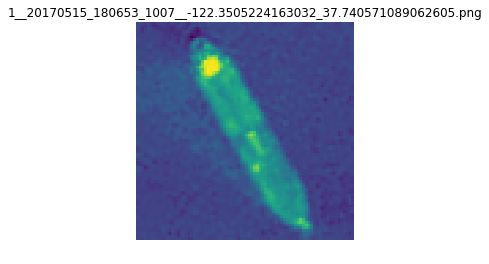

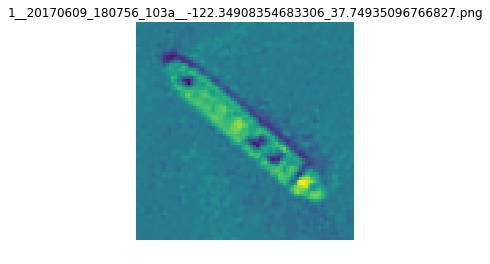

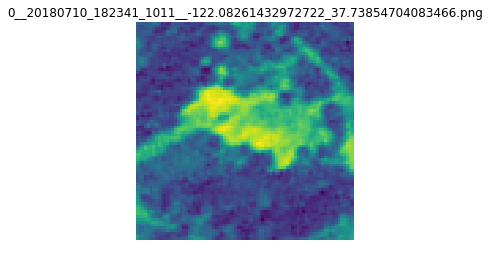

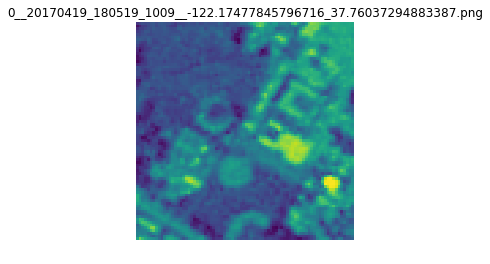

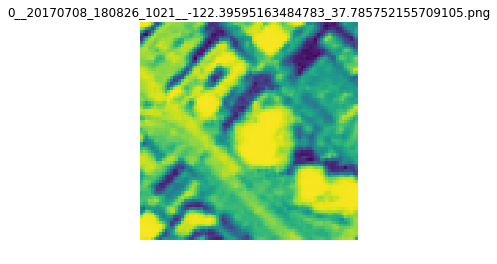

In [163]:
show_images(data_test.sample(5), 'name')

In [ ]:
# Funciones para redes neuronales tradicionales 

def extract_inputs(dataset):
    return dataset[INPUT_COLUMNS].values / 100

def extract_inputs_convolutional(dataset):
    return dataset[INPUT_COLUMNS].values.reshape(len(dataset), PICTURE_SIZE, PICTURE_SIZE, len(CHANNELS)) / 100

def extract_outputs(dataset):
    is_fruits_columns = [(dataset.nombres_frutas == nombres_frutas).values for nombres_frutas in FRUTAS]
    return np.array(is_fruits_columns).T